<a href="https://colab.research.google.com/github/SvetLanchY/CompLing/blob/main/Bibliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files 
files.upload()

with open('7_Noviy_zavet_doc.txt', encoding = "utf-8") as f:
    data = f.read()


Saving 7_Noviy_zavet_doc.txt to 7_Noviy_zavet_doc.txt


In [3]:
with open('7_Noviy_zavet_doc.txt', encoding = "utf-8") as f:
    data = f.read()




In [ ]:
!pip install pymystem3==0.1.10
!pip install pymorphy2[fast]

from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
mystem = Mystem() 
morph = MorphAnalyzer()

import re

import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist

In [26]:
def preprocess(data):
  preprocessed = data.lower().translate(str.maketrans('','',string.punctuation))
  preprocessed = re.sub(r'[\d+,\n+]', '', preprocessed)
  preprocessed = re.sub('  ', '', preprocessed)
  preprocessed = mystem.lemmatize(preprocessed)
  return preprocessed  
print(preprocess(data))
 
 


['\ufeff ', 'евангелие', ' ', 'от', ' ', 'матфеяродословие', ' ', 'иисус', ' ', 'христос', ' ', 'сын', ' ', 'давидова', ' ', 'сын', ' ', 'авраамов', ' ', 'авраам', ' ', 'рожать', ' ', 'исаак', ' ', 'исаак', ' ', 'рожать', ' ', 'иаков', ' ', 'иаков', ' ', 'рожать', ' ', 'иуда', ' ', 'и', ' ', 'брат', ' ', 'он', ' ', 'иуда', ' ', 'рожать', ' ', 'фарес', ' ', 'и', ' ', 'зара', ' ', 'от', ' ', 'фамари', ' ', 'фарес', ' ', 'рожать', ' ', 'есром', ' ', 'есром', ' ', 'рожать', ' ', 'арам', ' ', 'арам', ' ', 'рожать', ' ', 'аминадав', ' ', 'аминадать', ' ', 'рожать', ' ', 'наассон', ' ', 'наассон', ' ', 'рожать', ' ', 'салмон', ' ', 'салмон', ' ', 'рожать', ' ', 'вооз', ' ', 'от', ' ', 'рахава', ' ', 'вооз', ' ', 'рожать', ' ', 'овид', ' ', 'от', ' ', 'руфь', ' ', 'овид', ' ', 'рожать', ' ', 'иессей', ' ', 'иессей', ' ', 'рожать', ' ', 'давид', ' ', 'царь', ' ', 'давид', ' ', 'царь', ' ', 'рожать', ' ', 'соломон', ' ', 'от', ' ', 'бывший', ' ', 'за', ' ', 'урия', ' ', 'соломон', ' ', 'рожать',

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


rustopwords = stopwords.words('russian')
rustopwords.extend(['который', 'это', 'свой', 'весь', 'твой', 'ваш', 'наш', 'сей', 'сие', ' '])
data1 = [word for word in preprocess(data) if word not in rustopwords]
print(sorted(data1))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['\n', 'аарон', 'аарон', 'аарон', 'аарон', 'ааронов', 'аваддон', 'авва', 'авва', 'авва', 'август', 'август', 'августов', 'августов', 'авелева', 'авель', 'авель', 'авель', 'авиафар', 'авиева', 'авий', 'авилиный', 'авиуда', 'авиуда', 'авия', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 'авраам', 

In [29]:
from nltk.probability import FreqDist
fdist = FreqDist(data1)
fdist.most_common(25)


[('сказать', 1314),
 ('говорить', 1160),
 ('иисус', 1014),
 ('ибо', 977),
 ('бог', 875),
 ('иметь', 498),
 ('христос', 491),
 ('человек', 487),
 ('божий', 483),
 ('знать', 414),
 ('день', 414),
 ('господь', 410),
 ('сын', 399),
 ('дух', 383),
 ('приходить', 381),
 ('отец', 372),
 ('давать', 369),
 ('народ', 368),
 ('слово', 352),
 ('видеть', 309),
 ('всякий', 297),
 ('мир', 282),
 ('ученик', 275),
 ('пойти', 245),
 ('вера', 245)]

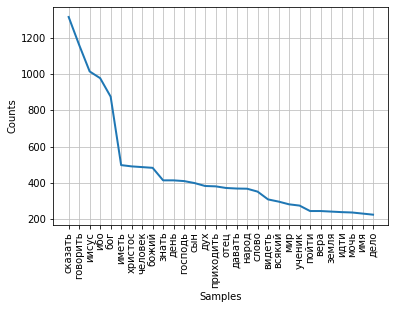

In [30]:
fdist.plot(30,cumulative=False)

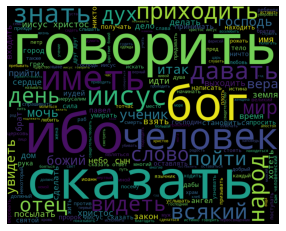

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text_raw = " ".join(data1)

wc = WordCloud(background_color="black", max_words=200, width=1000, height=800).generate(text_raw)
plt.axis("off")
plt.imshow(wc)
